In [1]:
import pandas as pd

df = pd.read_csv('merged-dataset.csv', parse_dates=['start_date', 'end_date', 'inv_item_date'])

/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_30719/1993625587.py:3: DtypeWarning: Columns (12,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged-dataset.csv', parse_dates=['start_date', 'end_date', 'inv_item_date'])
/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_30719/1993625587.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('merged-dataset.csv', parse_dates=['start_date', 'end_date', 'inv_item_date'])
/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_30719/1993625587.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('merged-dataset.csv', parse_dates=['start_date', 'end_date', 'inv_item_date'])


In [2]:
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228636 entries, 0 to 228635
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   season               228636 non-null  int64         
 1   field                228636 non-null  object        
 2   work_type            228636 non-null  object        
 3   work_subtype         228636 non-null  object        
 4   start_date           228636 non-null  datetime64[ns]
 5   end_date             217100 non-null  datetime64[ns]
 6   completed_work_area  228636 non-null  object        
 7   main_tech            228636 non-null  object        
 8   add_tech             150610 non-null  object        
 9   mech                 228636 non-null  object        
 10  proc_depth           42139 non-null   object        
 11  prod_purpose         33861 non-null   object        
 12  prod_weight          228636 non-null  object        
 13  prod_dry_perc 

In [4]:
columns_to_convert = [
    'yield_fact', 'completed_work_area', 
    'field_area', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph', 
    'inv_item_weight', 'inv_item_dose', 'proc_depth', 'prod_purpose', 
    'prod_weight', 'prod_dry_perc', 'prod_humid', 'prod_impur'
]

for column in columns_to_convert:
    if column in df.columns:
        df[column] = df[column].str.replace(',', '.').apply(pd.to_numeric, errors='coerce')

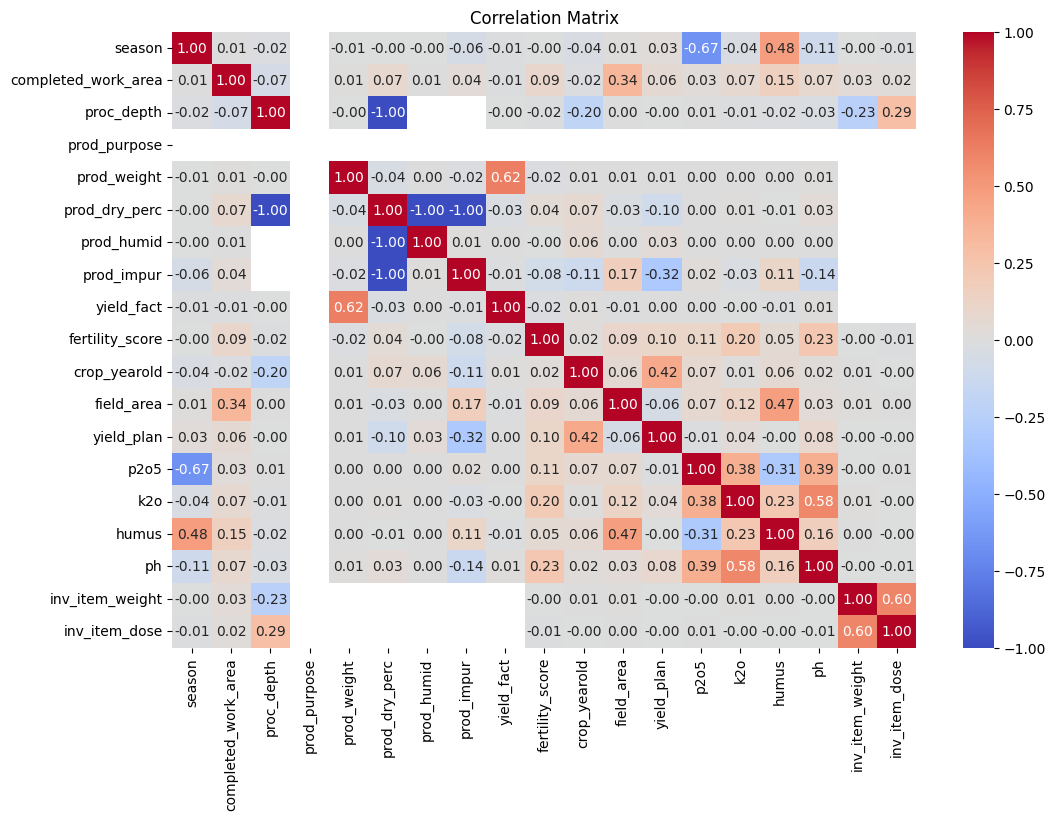

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228636 entries, 0 to 228635
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   season               228636 non-null  int64         
 1   field                228636 non-null  object        
 2   work_type            228636 non-null  object        
 3   work_subtype         228636 non-null  object        
 4   start_date           228636 non-null  datetime64[ns]
 5   end_date             217100 non-null  datetime64[ns]
 6   completed_work_area  228636 non-null  float64       
 7   main_tech            228636 non-null  object        
 8   add_tech             150610 non-null  object        
 9   mech                 228636 non-null  object        
 10  proc_depth           42139 non-null   float64       
 11  prod_purpose         0 non-null       float64       
 12  prod_weight          228636 non-null  float64       
 13  prod_dry_perc 